First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
 

Descript

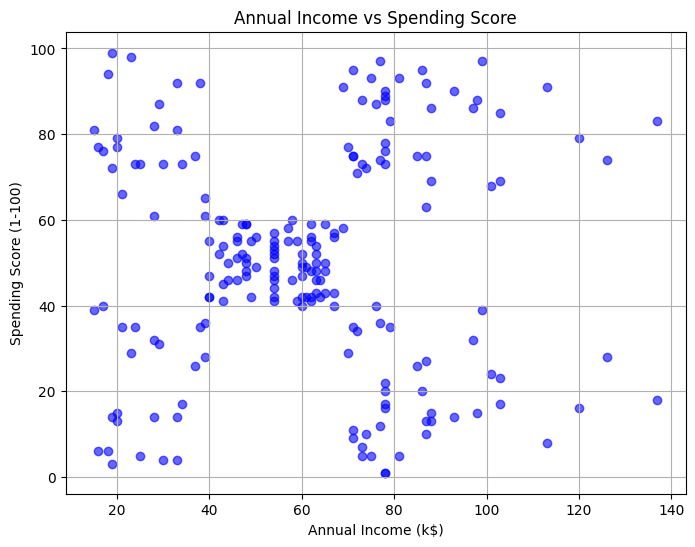

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


df = pd.read_csv("/content/Mall_Customers.csv")

print("First 5 rows of the dataset:")
print(df.head(), "\n")

print("Dataset Info:")
info_buffer = StringIO()
df.info(buf=info_buffer)
print(info_buffer.getvalue(), "\n")

print("Descriptive Statistics:")
print(df.describe(), "\n")

selected_df = df[["Annual Income (k$)", "Spending Score (1-100)"]]

plt.figure(figsize=(8, 6))
plt.scatter(selected_df["Annual Income (k$)"],
            selected_df["Spending Score (1-100)"],
            c="blue", alpha=0.6)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

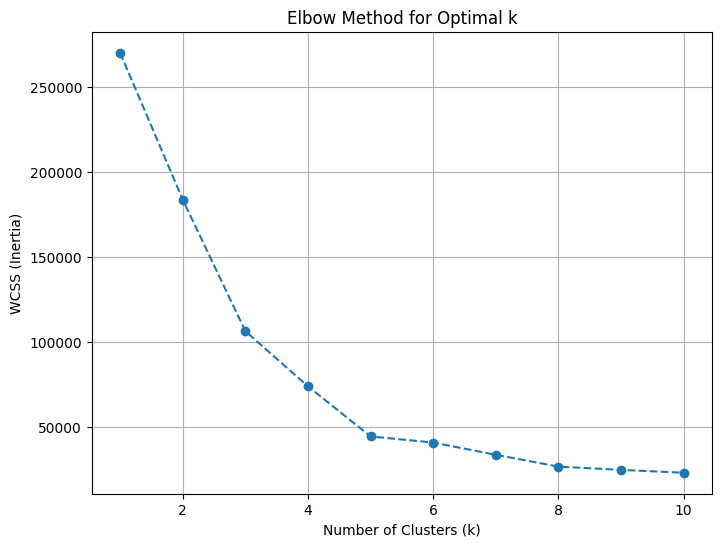

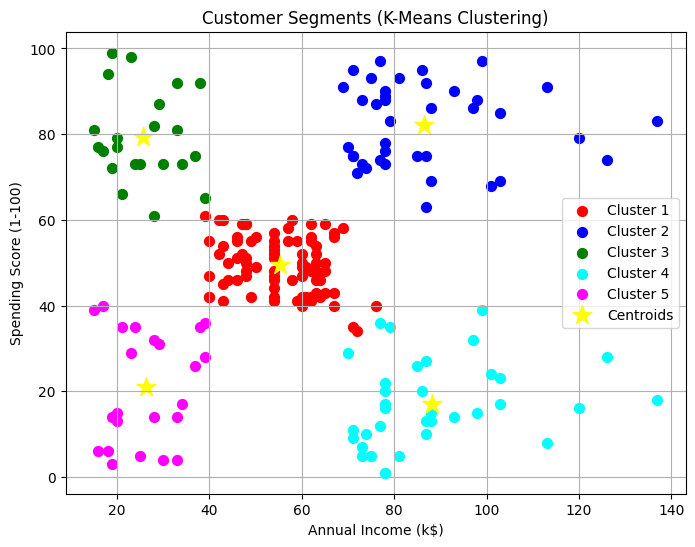

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv("Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(k_optimal):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


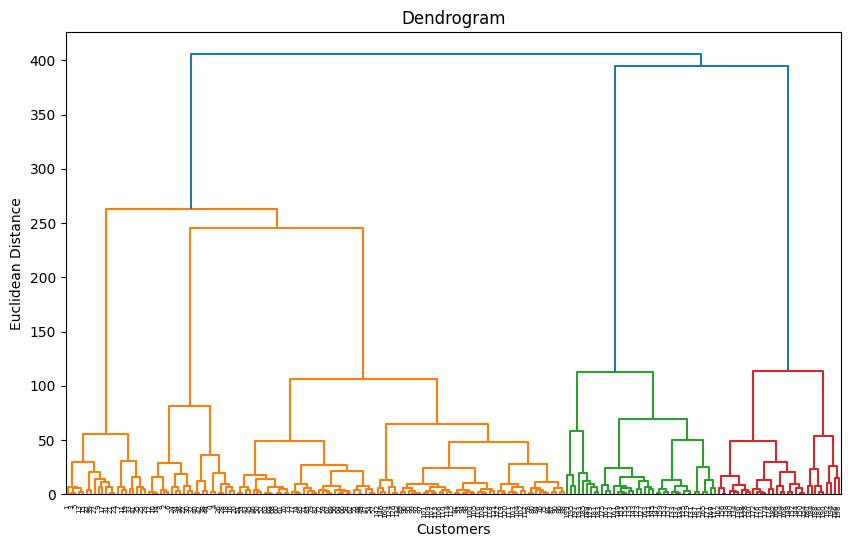

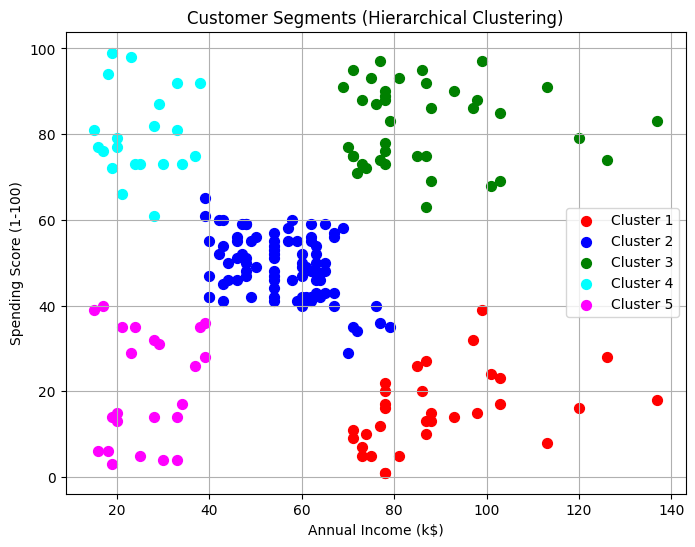

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title("Customer Segments (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

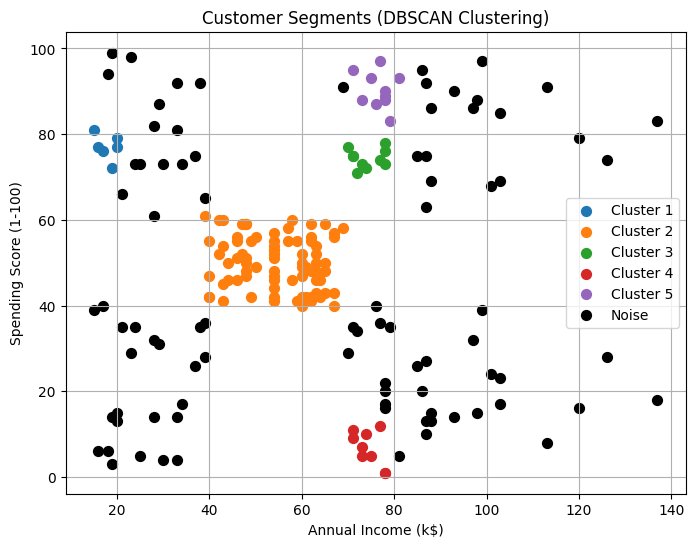

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
df = pd.read_csv("Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

labels = set(y_dbscan)
plt.figure(figsize=(8, 6))
for label in labels:
    if label == -1:

        plt.scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1],
                    s=50, c='black', label="Noise")
    else:
        plt.scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1],
                    s=50, label=f'Cluster {label+1}')

plt.title("Customer Segments (DBSCAN Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()